# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

  Using cached opencv-python-headless-4.5.3.56.tar.gz (89.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [232 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.6" and sys_platform == "linux" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.6" and sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
        Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
        Using cache

## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
#Instantiate our SumaaryWriter
writer = SummaryWriter(log_dir="./runs")

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [7]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

# Create training set and define training dataloader
training_data = datasets.MNIST(root='data', download=True,train=True, transform=transform)
test_data = datasets.MNIST(root='data', download=True,train=False, transform=transform)

# Create test set and define test dataloader
train_loader = DataLoader(training_data,batch_size=64, shuffle = True)
test_loader = DataLoader(test_data,batch_size=64)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

Transforms.ToTensor() — converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.
Transforms.Normalize() — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [8]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader,rows=5,cols=3):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(rows):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


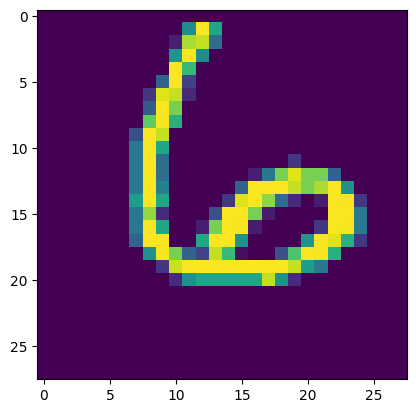

8


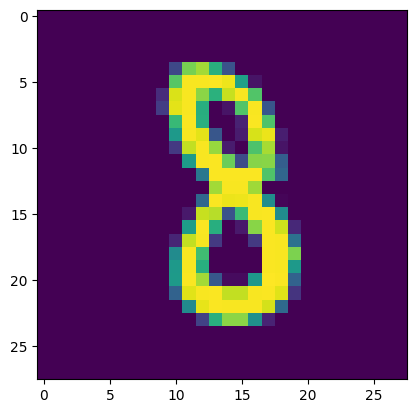

9


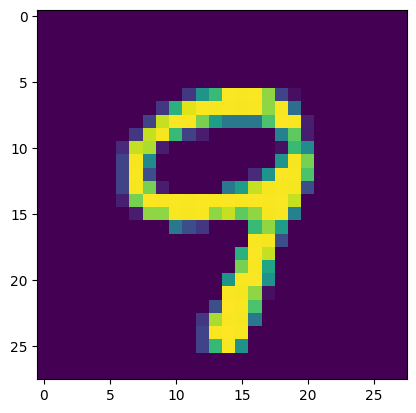

0


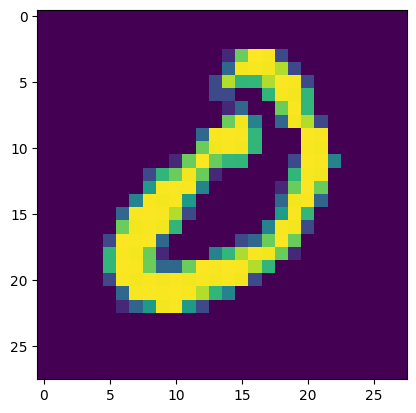

3


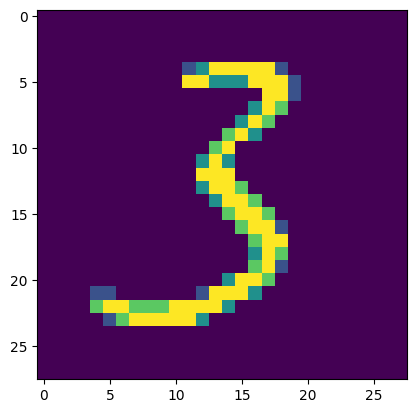

In [9]:
# Explore data
show5(train_loader)

In [10]:
#get some training images 
dataiter = iter(train_loader)
images, labels = next(dataiter)

#create a grid of images
grid = torchvision.utils.make_grid(images)

# Convert the grid tensor to a NumPy array and then to a Matplotlib figure
grid_np = grid.cpu().numpy()
fig = plt.figure(figsize=(8, 8))
plt.imshow(np.transpose(grid_np, (1, 2, 0)))
plt.axis('off')

#write grid to tensorboard
writer.add_image("MNIST_images", grid)

#write image to tensorboard
writer.add_figure("MNIST_images", fig)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [11]:
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu 
        self.output =F.log_softmax 
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
      
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.output(self.fc3(x), dim=1) 
        return x

mnist_model = MNIST_MLP()
if torch.cuda.is_available():
    mnist_model.cuda()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [12]:
criterion = nn.NLLLoss()

optimizer = optim.SGD(mnist_model.parameters(), lr=0.003, momentum=0.9)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [13]:
def train_network_mnist(net, train_loader,test_loader):
    num_epochs = 10
    train_loss_history = list()
    val_loss_history = list()
    
    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        train_correct = 0
        
        for images, labels in train_loader:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
            
            if torch.cuda.is_available():
                        images, labels = images.cuda(), labels.cuda()
                        
            optimizer.zero_grad()
            
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            _, preds = torch.max(outputs.data, 1)
            train_correct += (preds == labels).sum().item()
            train_loss += loss.item()
        print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss)
        
        
        val_loss = 0.0
        val_correct = 0
        net.eval()
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
        
            outputs = net(images)
            loss = criterion(outputs, labels)
            
            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()
        print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
        val_loss_history.append(val_loss)           

    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()
                        
                        

Plot the training loss (and validation loss/accuracy, if recorded).

Epoch 1 training accuracy: 51.63% training loss: 0.66432
Epoch 1 validation accuracy: 57.59% validation loss: 0.32742
Epoch 2 training accuracy: 58.48% training loss: 0.28764
Epoch 2 validation accuracy: 59.40% validation loss: 0.23706
Epoch 3 training accuracy: 59.67% training loss: 0.22301
Epoch 3 validation accuracy: 59.75% validation loss: 0.20259
Epoch 4 training accuracy: 60.55% training loss: 0.17953
Epoch 4 validation accuracy: 60.41% validation loss: 0.16837
Epoch 5 training accuracy: 61.12% training loss: 0.14893
Epoch 5 validation accuracy: 60.89% validation loss: 0.15263
Epoch 6 training accuracy: 61.56% training loss: 0.12676
Epoch 6 validation accuracy: 61.20% validation loss: 0.12827
Epoch 7 training accuracy: 61.84% training loss: 0.11043
Epoch 7 validation accuracy: 61.46% validation loss: 0.11439
Epoch 8 training accuracy: 62.06% training loss: 0.09922
Epoch 8 validation accuracy: 61.73% validation loss: 0.10109
Epoch 9 training accuracy: 62.27% training loss: 0.08849

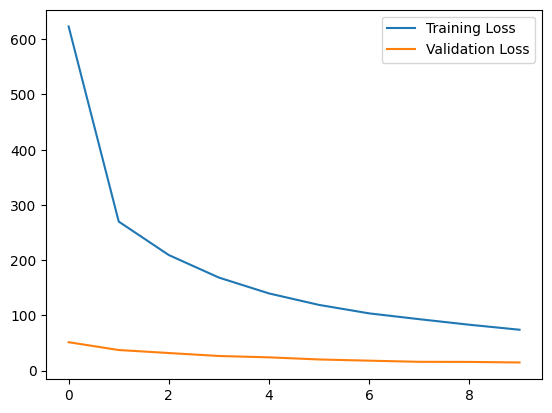

In [23]:
train_network_mnist(mnist_model,train_loader,test_loader)

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [24]:
correct_count, all_count = 0, 0
for images,labels in test_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = mnist_model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9715


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [14]:
class MNIST_MLP_HPO(nn.Module):
    def __init__(self,dropout_prob=0.5):
        super().__init__()
        self.activation = F.relu 
        self.output =F.log_softmax 
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p=dropout_prob)
      
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        x = self.output(self.fc3(x), dim=1) 
        return x

mnist_model_hpo = MNIST_MLP_HPO()
if torch.cuda.is_available():
    mnist_model_hpo.cuda()

In [17]:

class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.counter = 0

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1

        return self.counter >= self.patience

def train_network_mnist_hpo(net, train_loader, test_loader, weight_decay_values=[0.0001, 0.001, 0.01], dropout_prob=0.7, num_restarts=3):
    num_epochs = 10
    best_net = None
    best_accuracy = 0.0
    best_weight_decay = None

    for weight_decay in weight_decay_values:
        print(f"Training with weight_decay={weight_decay}")
        for restart in range(num_restarts):
            net.apply(weight_reset)
            print(f"Restart {restart + 1}/{num_restarts}")
            
            criterion = nn.NLLLoss()
            optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9, weight_decay=weight_decay)
            scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
            early_stopping = EarlyStopping(patience=5, min_delta=0.01)
            
            train_loss_history, val_loss_history = [], []
            train_accuracy_history, val_accuracy_history = [], []
            
            for epoch in range(num_epochs):
                net.train()
                train_loss = 0.0
                train_correct = 0
                
                for images, labels in train_loader:
                    if torch.cuda.is_available():
                        images, labels = images.cuda(), labels.cuda()

                    optimizer.zero_grad() #Zero out the gradient of the optimizer
                    outputs = net(images) #get the output logits from the model
                    loss = criterion(outputs, labels)
                    
                    loss.backward()
                    optimizer.step()

                    _, preds = torch.max(outputs, 1) #Get class predictions from the outputs
                    train_correct += (preds == labels).sum().item() #update the number of correct predictions
                    train_loss += loss.item() #Update the running loss

                train_accuracy = train_correct / len(train_loader.dataset)
                train_loss /= len(train_loader)
                train_loss_history.append(train_loss)
                train_accuracy_history.append(train_accuracy)

                val_loss, val_correct = evaluate_network(net, test_loader)
                val_accuracy = val_correct / len(test_loader.dataset)
                val_loss_history.append(val_loss)
                val_accuracy_history.append(val_accuracy)

                scheduler.step()

                print(f'Epoch {epoch + 1}/{num_epochs}, Train Accuracy: {train_accuracy:.2f}, Train Loss: {train_loss:.5f}, Validation Accuracy: {val_accuracy:.2f}, Validation Loss: {val_loss:.5f}')
            
                if early_stopping(val_loss):
                    print("Early stopping triggered")
                    break

            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_net = net
                best_weight_decay = weight_decay

    print(f"Best weight_decay: {best_weight_decay}, Best validation accuracy: {best_accuracy:.2f}")
    
    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    return best_net

def evaluate_network(net, data_loader):
    criterion = nn.NLLLoss()
    net.eval()
    total_loss = 0.0
    total_correct = 0
    with torch.no_grad():
        for images, labels in data_loader:
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()

            outputs = net(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            total_correct += (preds == labels).sum().item()

    avg_loss = total_loss / len(data_loader)
    return avg_loss, total_correct

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()


Training with weight_decay=0.0001
Restart 1/3
Epoch 1/10, Train Accuracy: 0.71, Train Loss: 0.88670, Validation Accuracy: 0.91, Validation Loss: 0.30037
Epoch 2/10, Train Accuracy: 0.86, Train Loss: 0.46962, Validation Accuracy: 0.93, Validation Loss: 0.23873
Epoch 3/10, Train Accuracy: 0.89, Train Loss: 0.40097, Validation Accuracy: 0.94, Validation Loss: 0.20605
Epoch 4/10, Train Accuracy: 0.90, Train Loss: 0.35315, Validation Accuracy: 0.95, Validation Loss: 0.18099
Epoch 5/10, Train Accuracy: 0.91, Train Loss: 0.32088, Validation Accuracy: 0.95, Validation Loss: 0.16816
Epoch 6/10, Train Accuracy: 0.92, Train Loss: 0.27353, Validation Accuracy: 0.96, Validation Loss: 0.15043
Epoch 7/10, Train Accuracy: 0.93, Train Loss: 0.26404, Validation Accuracy: 0.96, Validation Loss: 0.14858
Epoch 8/10, Train Accuracy: 0.93, Train Loss: 0.25973, Validation Accuracy: 0.96, Validation Loss: 0.14486
Epoch 9/10, Train Accuracy: 0.93, Train Loss: 0.25822, Validation Accuracy: 0.96, Validation Loss:

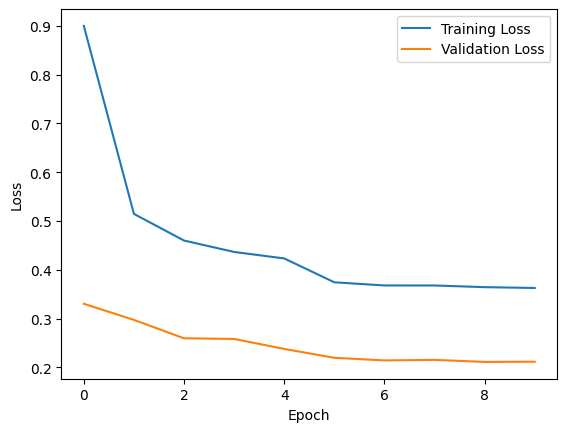

MNIST_MLP_HPO(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [18]:
train_network_mnist_hpo(mnist_model_hpo,train_loader,test_loader,weight_decay_values=[0.0001, 0.001, 0.01],dropout_prob=0.5,num_restarts=3)

In [19]:
correct_count, all_count = 0, 0
for images,labels in test_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = mnist_model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.0984


## Saving your model
Using `torch.save`, save your model for future loading.

In [22]:
torch.save(train_network_mnist_hpo, 'model.pth')